<a href="https://colab.research.google.com/github/agsosin/COLAB/blob/main/11820_Agnieszka_Sosin_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#kod z ChatGPT - to samo, ale mniej uproszczone
# ZADANIE 2 ZMSI Lab 1

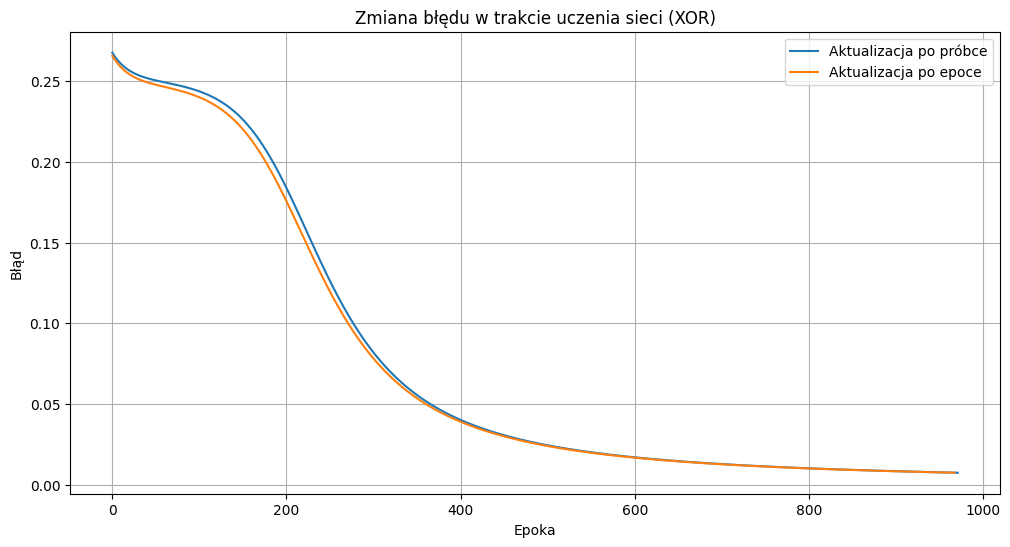

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja unipolarna sigmoidalna
def sigmoid(x, beta):
    return 1.0 / (1.0 + np.exp(-beta * x))

# Funkcja bipolarna sigmoidalna (tanh)
def tanh(x, beta):
    return np.tanh(beta * x)

# Pochodna sigmoidalnej (unipolarnej)
def sigmoid_diff(y, beta):
    return beta * y * (1 - y)

# Pochodna sigmoidalnej bipolarnej (tanh)
def tanh_diff(y, beta):
    return beta * (1 - y * y)

# Implementacja sieci neuronowej
def mlp(x, w1, w2, beta):
    beta1, beta2 = beta

    # Warstwa ukryta
    z_net = np.dot(w1, x)
    z = tanh(z_net, beta1)
    z = np.insert(z, 0, 1)  # Dodanie biasu

    # Warstwa wyjściowa
    y_net = np.dot(w2, z)
    y = sigmoid(y_net, beta2)

    return y, z_net, z, y_net

# Trening - aktualizacja wag po każdej próbce
def train_sample(xx, d, eta, beta, max_epochs=100000, tolerance=0.1):
    # Inicjalizacja wag
    np.random.seed(42)
    w1 = np.random.uniform(-0.5, 0.5, (2, 3))  # 2 neurony ukryte, 3 wejścia (w tym bias)
    w2 = np.random.uniform(-0.5, 0.5, 3)      # 1 neuron wyjściowy, 3 wejścia (w tym bias)

    beta1, beta2 = beta
    errors = []  # Błędy dla wykresu
    epoch = 0

    while epoch < max_epochs:
        total_error = 0
        for i in range(len(xx)):
            x = xx[i]
            target = d[i]

            # Forward pass
            y, z_net, z, y_net = mlp(x, w1, w2, beta)

            # Liczenie błędu
            error = target - y
            total_error += error ** 2

            # Backpropagation
            delta_out = error * sigmoid_diff(y, beta2)  # Dla wyjścia
            delta_hidden = tanh_diff(z[1:], beta1) * w2[1:] * delta_out  # Dla warstwy ukrytej

            # Aktualizacja wag
            w2 += eta * delta_out * z  # Wagi wyjściowe
            w1 += eta * np.outer(delta_hidden, x)  # Wagi ukryte

        # Błąd w każdej epoce
        errors.append(total_error / len(xx))

        # Sprawdzenie tolerancji
        if all((y > 0.9 and target == 1) or (y < 0.1 and target == 0) for y, target in zip([mlp(x, w1, w2, beta)[0] for x in xx], d)):
            break

        epoch += 1

    return w1, w2, errors

# Trening - aktualizacja wag po każdej epoce
def train_epoch(xx, d, eta, beta, max_epochs=100000, tolerance=0.1):
    # Inicjalizacja wag
    np.random.seed(42)
    w1 = np.random.uniform(-0.5, 0.5, (2, 3))  # 2 neurony ukryte, 3 wejścia (w tym bias)
    w2 = np.random.uniform(-0.5, 0.5, 3)      # 1 neuron wyjściowy, 3 wejścia (w tym bias)

    beta1, beta2 = beta
    errors = []  # Błędy dla wykresu
    epoch = 0

    while epoch < max_epochs:
        total_error = 0
        w1_update = np.zeros_like(w1)
        w2_update = np.zeros_like(w2)

        for i in range(len(xx)):
            x = xx[i]
            target = d[i]

            # Forward pass
            y, z_net, z, y_net = mlp(x, w1, w2, beta)

            # Liczenie błędu
            error = target - y
            total_error += error ** 2

            # Backpropagation
            delta_out = error * sigmoid_diff(y, beta2)  # Dla wyjścia
            delta_hidden = tanh_diff(z[1:], beta1) * w2[1:] * delta_out  # Dla warstwy ukrytej

            # Sumowanie zmian wag
            w2_update += eta * delta_out * z
            w1_update += eta * np.outer(delta_hidden, x)

        # Aktualizacja wag po jednej epoce
        w2 += w2_update
        w1 += w1_update

        # Błąd w każdej epoce
        errors.append(total_error / len(xx))

        # Sprawdzenie tolerancji
        if all((y > 0.9 and target == 1) or (y < 0.1 and target == 0) for y, target in zip([mlp(x, w1, w2, beta)[0] for x in xx], d)):
            break

        epoch += 1

    return w1, w2, errors

# Problem XOR
xx = np.array([[1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])
d = np.array([0, 1, 1, 0])

# Parametry
eta = 0.1  # Współczynnik uczenia
beta = (1, 1)  # Parametry funkcji aktywacji

# Trening
w1_sample, w2_sample, errors_sample = train_sample(xx, d, eta, beta)
w1_epoch, w2_epoch, errors_epoch = train_epoch(xx, d, eta, beta)

# Wykres błędów
plt.figure(figsize=(12, 6))
plt.plot(errors_sample, label='Aktualizacja po próbce')
plt.plot(errors_epoch, label='Aktualizacja po epoce')
plt.xlabel('Epoka')
plt.ylabel('Błąd')
plt.title('Zmiana błędu w trakcie uczenia sieci (XOR)')
plt.legend()
plt.grid()
plt.show()


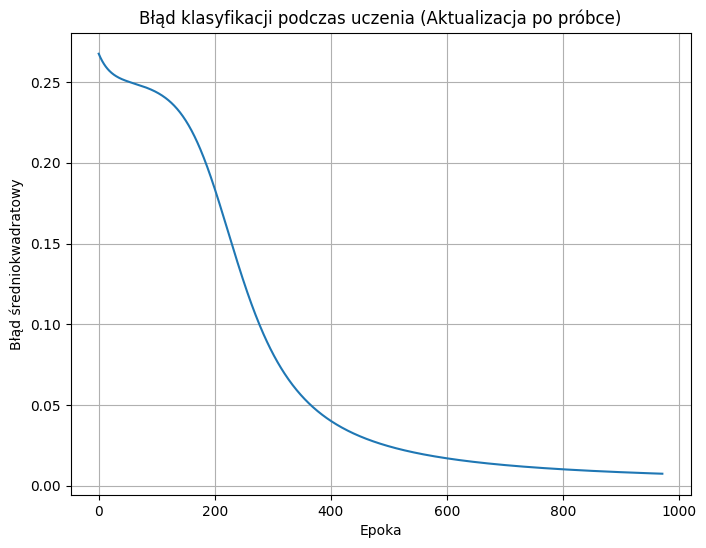


Wagi po treningu (Aktualizacja po próbce):
w1:
 [[ 1.43686921  1.61035949  1.61046183]
 [ 1.49006559 -1.65546089 -1.65515032]]
w2:
 [-2.34598046  2.73607669  2.73441998]

Ostateczny błąd (Aktualizacja po próbce): 0.007523850577296002
Liczba epok do osiągnięcia zera błędów (Aktualizacja po próbce): 972


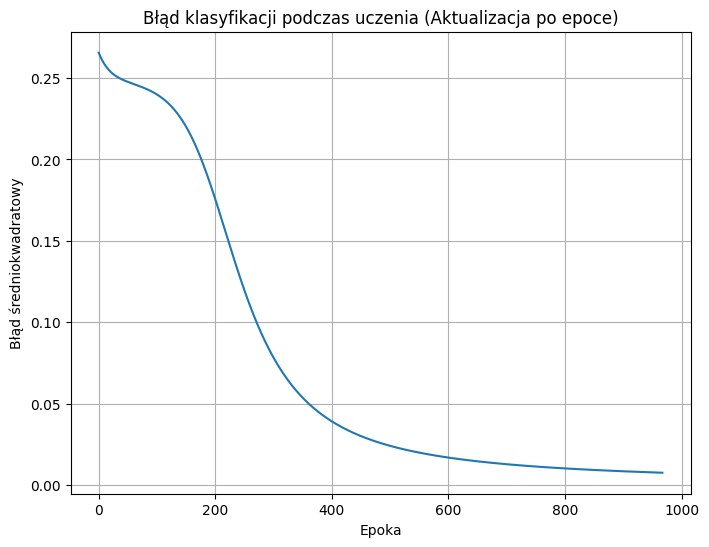


Wagi po treningu (Aktualizacja po epoce):
w1:
 [[ 1.43262615  1.60712062  1.60703122]
 [ 1.48851794 -1.6533681  -1.65325657]]
w2:
 [-2.34544702  2.73768613  2.73483621]

Ostateczny błąd (Aktualizacja po epoce): 0.00752749773687386
Liczba epok do osiągnięcia zera błędów (Aktualizacja po epoce): 968


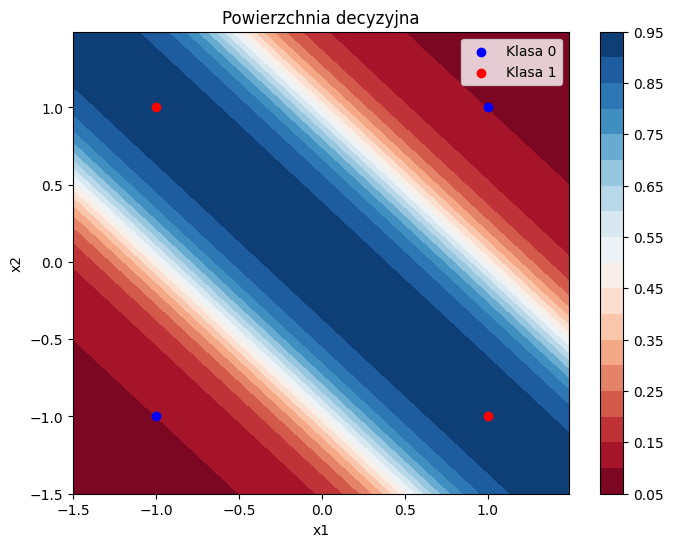

In [10]:
# prompt: dorzuć powierzchnię decyzyjną

import numpy as np
import matplotlib.pyplot as plt

# ... (your existing code for functions: sigmoid, tanh, sigmoid_diff, tanh_diff, mlp, train_sample, train_epoch)

# Problem XOR
xx = np.array([[1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])
d = np.array([0, 1, 1, 0])

# Parametry
eta = 0.1  # Współczynnik uczenia
beta = (1, 1)  # Parametry funkcji aktywacji

# Trening i wizualizacja błędów dla obu metod
for method_name, training_function in [("Aktualizacja po próbce", train_sample), ("Aktualizacja po epoce", train_epoch)]:
    w1, w2, errors = training_function(xx, d, eta, beta)

    plt.figure(figsize=(8, 6))
    plt.plot(errors)
    plt.xlabel("Epoka")
    plt.ylabel("Błąd średniokwadratowy")
    plt.title(f"Błąd klasyfikacji podczas uczenia ({method_name})")
    plt.grid(True)
    plt.show()

    # Wyświetlenie wag po treningu
    print(f"\nWagi po treningu ({method_name}):")
    print("w1:\n", w1)
    print("w2:\n", w2)

    #Dodatkowe informacje o błędzie
    print(f"\nOstateczny błąd ({method_name}): {errors[-1]}")
    print(f"Liczba epok do osiągnięcia zera błędów ({method_name}): {len(errors)}")


# Wizualizacja powierzchni decyzyjnej
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
xx_grid, yy_grid = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.zeros_like(xx_grid)

for i in range(xx_grid.shape[0]):
    for j in range(xx_grid.shape[1]):
        x = np.array([1, xx_grid[i, j], yy_grid[i, j]])
        y, _, _, _ = mlp(x, w1, w2, beta)
        Z[i, j] = y

plt.figure(figsize=(8, 6))
CS = plt.contourf(xx_grid, yy_grid, Z, levels=20, cmap=plt.cm.RdBu)
plt.colorbar(CS)
plt.scatter(xx[d == 0][:, 1], xx[d == 0][:, 2], c='blue', label='Klasa 0')
plt.scatter(xx[d == 1][:, 1], xx[d == 1][:, 2], c='red', label='Klasa 1')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Powierzchnia decyzyjna")
plt.legend()
plt.show()

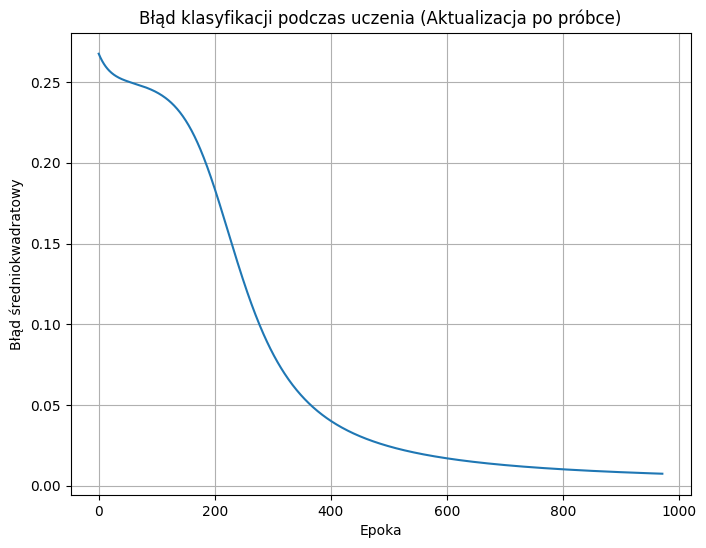


Wagi po treningu (Aktualizacja po próbce):
w1:
 [[ 1.43686921  1.61035949  1.61046183]
 [ 1.49006559 -1.65546089 -1.65515032]]
w2:
 [-2.34598046  2.73607669  2.73441998]

Ostateczny błąd (Aktualizacja po próbce): 0.007523850577296002
Liczba epok do osiągnięcia zera błędów (Aktualizacja po próbce): 972


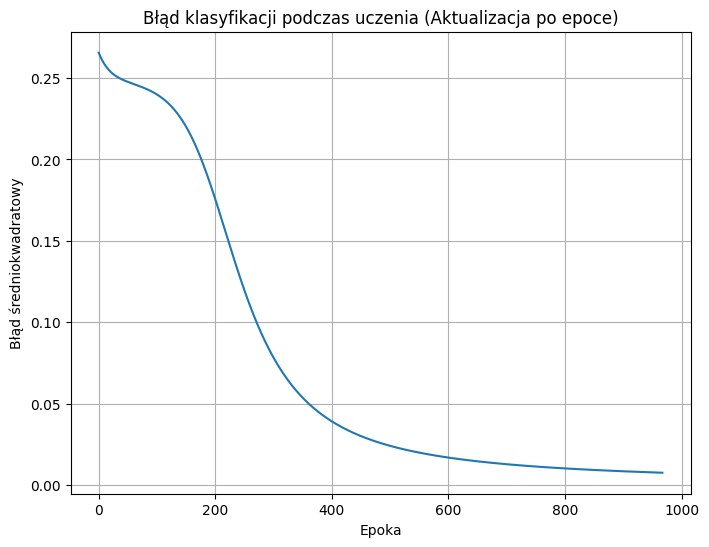


Wagi po treningu (Aktualizacja po epoce):
w1:
 [[ 1.43262615  1.60712062  1.60703122]
 [ 1.48851794 -1.6533681  -1.65325657]]
w2:
 [-2.34544702  2.73768613  2.73483621]

Ostateczny błąd (Aktualizacja po epoce): 0.00752749773687386
Liczba epok do osiągnięcia zera błędów (Aktualizacja po epoce): 968


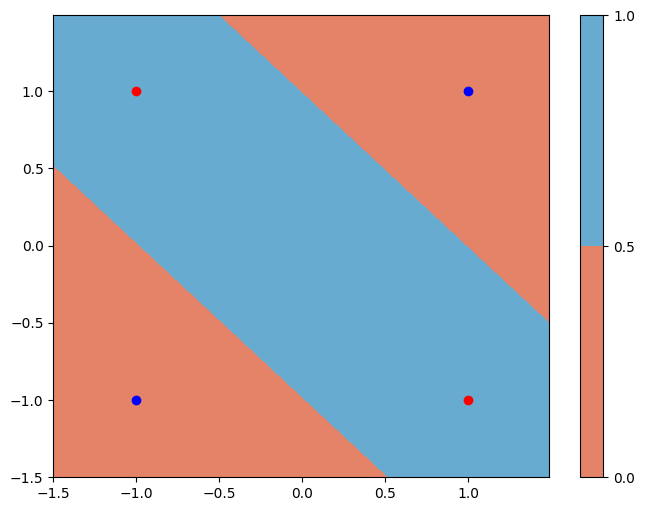

In [16]:
# prompt: podaj mi poniższy kod w całości (bez "rest of your code", do tego bez wag (interesują mnie tylko dwa kolory w powerzchni decyzyjnej))

import numpy as np
import matplotlib.pyplot as plt

# Funkcja unipolarna sigmoidalna
def sigmoid(x, beta):
    return 1.0 / (1.0 + np.exp(-beta * x))

# Funkcja bipolarna sigmoidalna (tanh)
def tanh(x, beta):
    return np.tanh(beta * x)

# Pochodna sigmoidalnej (unipolarnej)
def sigmoid_diff(y, beta):
    return beta * y * (1 - y)

# Pochodna sigmoidalnej bipolarnej (tanh)
def tanh_diff(y, beta):
    return beta * (1 - y * y)

# Implementacja sieci neuronowej
def mlp(x, w1, w2, beta):
    beta1, beta2 = beta

    # Warstwa ukryta
    z_net = np.dot(w1, x)
    z = tanh(z_net, beta1)
    z = np.insert(z, 0, 1)  # Dodanie biasu

    # Warstwa wyjściowa
    y_net = np.dot(w2, z)
    y = sigmoid(y_net, beta2)

    return y, z_net, z, y_net

# Trening - aktualizacja wag po każdej próbce
def train_sample(xx, d, eta, beta, max_epochs=100000, tolerance=0.1):
    # Inicjalizacja wag
    np.random.seed(42)
    w1 = np.random.uniform(-0.5, 0.5, (2, 3))  # 2 neurony ukryte, 3 wejścia (w tym bias)
    w2 = np.random.uniform(-0.5, 0.5, 3)      # 1 neuron wyjściowy, 3 wejścia (w tym bias)

    beta1, beta2 = beta
    errors = []  # Błędy dla wykresu
    epoch = 0

    while epoch < max_epochs:
        total_error = 0
        for i in range(len(xx)):
            x = xx[i]
            target = d[i]

            # Forward pass
            y, z_net, z, y_net = mlp(x, w1, w2, beta)

            # Liczenie błędu
            error = target - y
            total_error += error ** 2

            # Backpropagation
            delta_out = error * sigmoid_diff(y, beta2)  # Dla wyjścia
            delta_hidden = tanh_diff(z[1:], beta1) * w2[1:] * delta_out  # Dla warstwy ukrytej

            # Aktualizacja wag
            w2 += eta * delta_out * z  # Wagi wyjściowe
            w1 += eta * np.outer(delta_hidden, x)  # Wagi ukryte

        # Błąd w każdej epoce
        errors.append(total_error / len(xx))

        # Sprawdzenie tolerancji
        if all((y > 0.9 and target == 1) or (y < 0.1 and target == 0) for y, target in zip([mlp(x, w1, w2, beta)[0] for x in xx], d)):
            break

        epoch += 1

    return w1, w2, errors

# Trening - aktualizacja wag po każdej epoce
def train_epoch(xx, d, eta, beta, max_epochs=100000, tolerance=0.1):
    # Inicjalizacja wag
    np.random.seed(42)
    w1 = np.random.uniform(-0.5, 0.5, (2, 3))  # 2 neurony ukryte, 3 wejścia (w tym bias)
    w2 = np.random.uniform(-0.5, 0.5, 3)      # 1 neuron wyjściowy, 3 wejścia (w tym bias)

    beta1, beta2 = beta
    errors = []  # Błędy dla wykresu
    epoch = 0

    while epoch < max_epochs:
        total_error = 0
        w1_update = np.zeros_like(w1)
        w2_update = np.zeros_like(w2)

        for i in range(len(xx)):
            x = xx[i]
            target = d[i]

            # Forward pass
            y, z_net, z, y_net = mlp(x, w1, w2, beta)

            # Liczenie błędu
            error = target - y
            total_error += error ** 2

            # Backpropagation
            delta_out = error * sigmoid_diff(y, beta2)  # Dla wyjścia
            delta_hidden = tanh_diff(z[1:], beta1) * w2[1:] * delta_out  # Dla warstwy ukrytej

            # Sumowanie zmian wag
            w2_update += eta * delta_out * z
            w1_update += eta * np.outer(delta_hidden, x)

        # Aktualizacja wag po jednej epoce
        w2 += w2_update
        w1 += w1_update

        # Błąd w każdej epoce
        errors.append(total_error / len(xx))

        # Sprawdzenie tolerancji
        if all((y > 0.9 and target == 1) or (y < 0.1 and target == 0) for y, target in zip([mlp(x, w1, w2, beta)[0] for x in xx], d)):
            break

        epoch += 1

    return w1, w2, errors

# Problem XOR
xx = np.array([[1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])
d = np.array([0, 1, 1, 0])

# Parametry
eta = 0.1  # Współczynnik uczenia
beta = (1, 1)  # Parametry funkcji aktywacji

# Trening i wizualizacja błędów dla obu metod
for method_name, training_function in [("Aktualizacja po próbce", train_sample), ("Aktualizacja po epoce", train_epoch)]:
    w1, w2, errors = training_function(xx, d, eta, beta)

    plt.figure(figsize=(8, 6))
    plt.plot(errors)
    plt.xlabel("Epoka")
    plt.ylabel("Błąd średniokwadratowy")
    plt.title(f"Błąd klasyfikacji podczas uczenia ({method_name})")
    plt.grid(True)
    plt.show()

    # Wyświetlenie wag po treningu
    print(f"\nWagi po treningu ({method_name}):")
    print("w1:\n", w1)
    print("w2:\n", w2)

    #Dodatkowe informacje o błędzie
    print(f"\nOstateczny błąd ({method_name}): {errors[-1]}")
    print(f"Liczba epok do osiągnięcia zera błędów ({method_name}): {len(errors)}")


# Wizualizacja powierzchni decyzyjnej
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
xx_grid, yy_grid = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.zeros_like(xx_grid)

for i in range(xx_grid.shape[0]):
    for j in range(xx_grid.shape[1]):
        x = np.array([1, xx_grid[i, j], yy_grid[i, j]])
        y, _, _, _ = mlp(x, w1, w2, beta)
        Z[i, j] = y

plt.figure(figsize=(8, 6))
CS = plt.contourf(xx_grid, yy_grid, Z, levels=[0,0.5,1], cmap=plt.cm.RdBu) #zmiana poziomu
plt.colorbar(CS)
plt.scatter(xx[d == 0][:, 1], xx[d == 0][:, 2], c='blue', label='Klasa 0')
plt.scatter(xx[d == 1][:, 1], xx[d == 1][:, 2], c='red', label='Klasa 1')


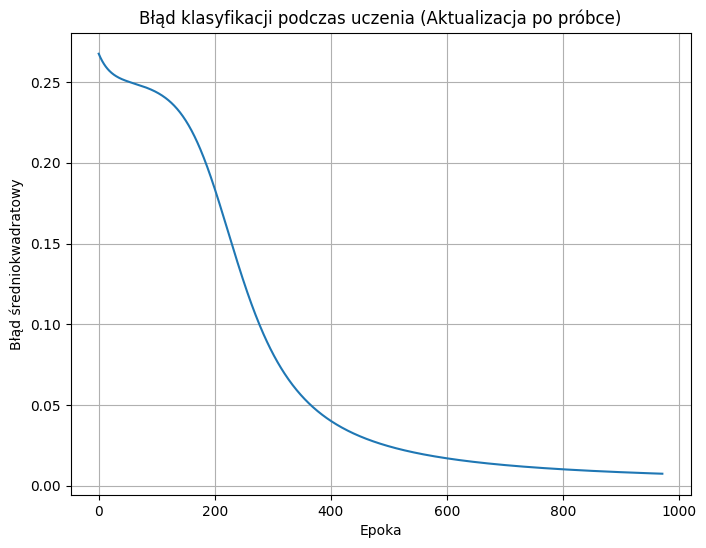


Wagi po treningu (Aktualizacja po próbce):
w1:
 [[ 1.43686921  1.61035949  1.61046183]
 [ 1.49006559 -1.65546089 -1.65515032]]
w2:
 [-2.34598046  2.73607669  2.73441998]

Ostateczny błąd (Aktualizacja po próbce): 0.007523850577296002
Liczba epok do osiągnięcia zera błędów (Aktualizacja po próbce): 972


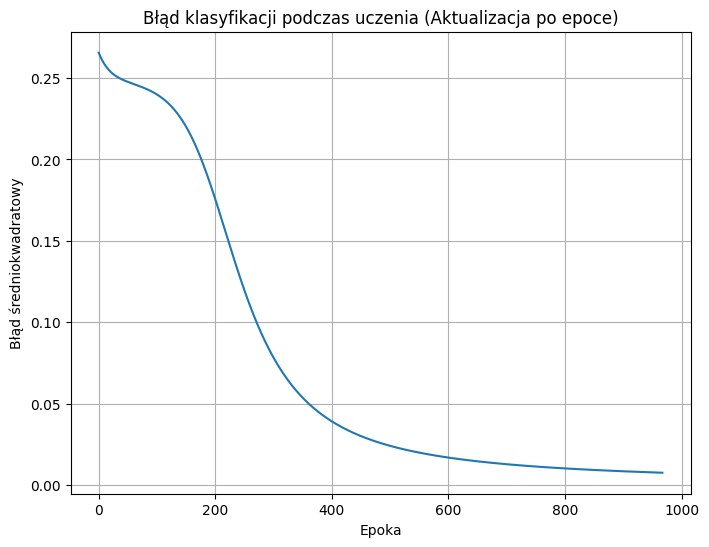


Wagi po treningu (Aktualizacja po epoce):
w1:
 [[ 1.43262615  1.60712062  1.60703122]
 [ 1.48851794 -1.6533681  -1.65325657]]
w2:
 [-2.34544702  2.73768613  2.73483621]

Ostateczny błąd (Aktualizacja po epoce): 0.00752749773687386
Liczba epok do osiągnięcia zera błędów (Aktualizacja po epoce): 968


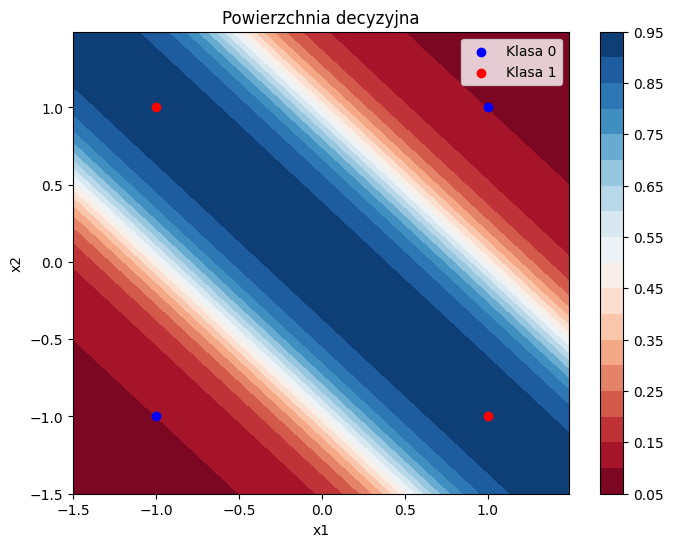

In [17]:
# prompt: i jeszcze bez wag

import numpy as np
import matplotlib.pyplot as plt

# ... (your existing code for functions: sigmoid, tanh, sigmoid_diff, tanh_diff, mlp, train_sample, train_epoch)

# Problem XOR
xx = np.array([[1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])
d = np.array([0, 1, 1, 0])

# Parametry
eta = 0.1  # Współczynnik uczenia
beta = (1, 1)  # Parametry funkcji aktywacji

# Trening i wizualizacja błędów dla obu metod
for method_name, training_function in [("Aktualizacja po próbce", train_sample), ("Aktualizacja po epoce", train_epoch)]:
    w1, w2, errors = training_function(xx, d, eta, beta)

    plt.figure(figsize=(8, 6))
    plt.plot(errors)
    plt.xlabel("Epoka")
    plt.ylabel("Błąd średniokwadratowy")
    plt.title(f"Błąd klasyfikacji podczas uczenia ({method_name})")
    plt.grid(True)
    plt.show()

    # Wyświetlenie wag po treningu
    print(f"\nWagi po treningu ({method_name}):")
    print("w1:\n", w1)
    print("w2:\n", w2)

    #Dodatkowe informacje o błędzie
    print(f"\nOstateczny błąd ({method_name}): {errors[-1]}")
    print(f"Liczba epok do osiągnięcia zera błędów ({method_name}): {len(errors)}")


# Wizualizacja powierzchni decyzyjnej
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
xx_grid, yy_grid = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.zeros_like(xx_grid)

for i in range(xx_grid.shape[0]):
    for j in range(xx_grid.shape[1]):
        x = np.array([1, xx_grid[i, j], yy_grid[i, j]])
        y, _, _, _ = mlp(x, w1, w2, beta)
        Z[i, j] = y

plt.figure(figsize=(8, 6))
CS = plt.contourf(xx_grid, yy_grid, Z, levels=20, cmap=plt.cm.RdBu)
plt.colorbar(CS)
plt.scatter(xx[d == 0][:, 1], xx[d == 0][:, 2], c='blue', label='Klasa 0')
plt.scatter(xx[d == 1][:, 1], xx[d == 1][:, 2], c='red', label='Klasa 1')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Powierzchnia decyzyjna")
plt.legend()
plt.show()


Błędy dla Aktualizacja po próbce:
     Epoka      Błąd
0        0  0.267453
1        1  0.266609
2        2  0.265804
3        3  0.265036
4        4  0.264304
..     ...       ...
967    967  0.007572
968    968  0.007560
969    969  0.007548
970    970  0.007536
971    971  0.007524

[972 rows x 2 columns]


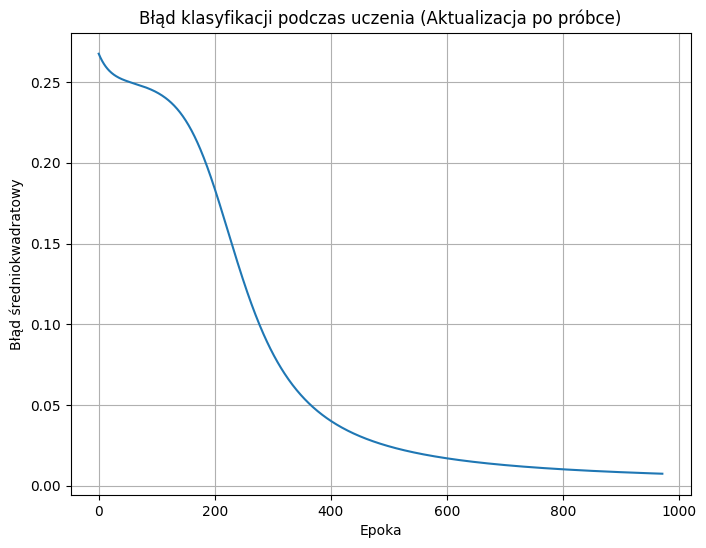


Błędy dla Aktualizacja po epoce:
     Epoka      Błąd
0        0  0.265548
1        1  0.264678
2        2  0.263847
3        3  0.263054
4        4  0.262297
..     ...       ...
963    963  0.007575
964    964  0.007563
965    965  0.007551
966    966  0.007539
967    967  0.007527

[968 rows x 2 columns]


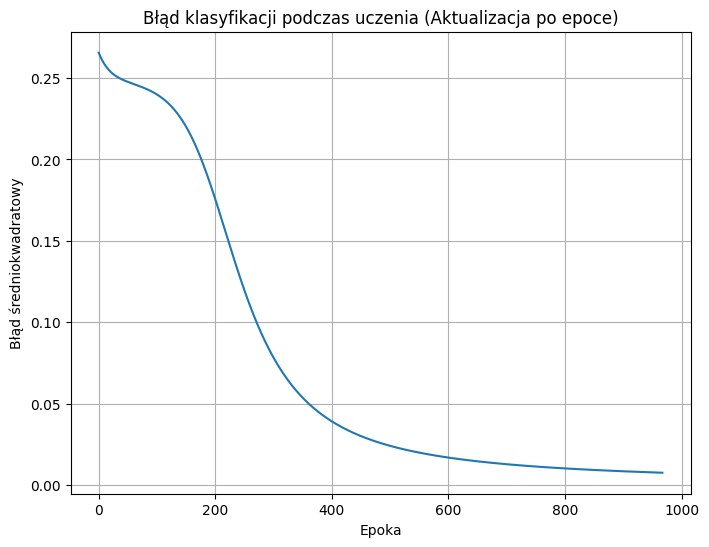

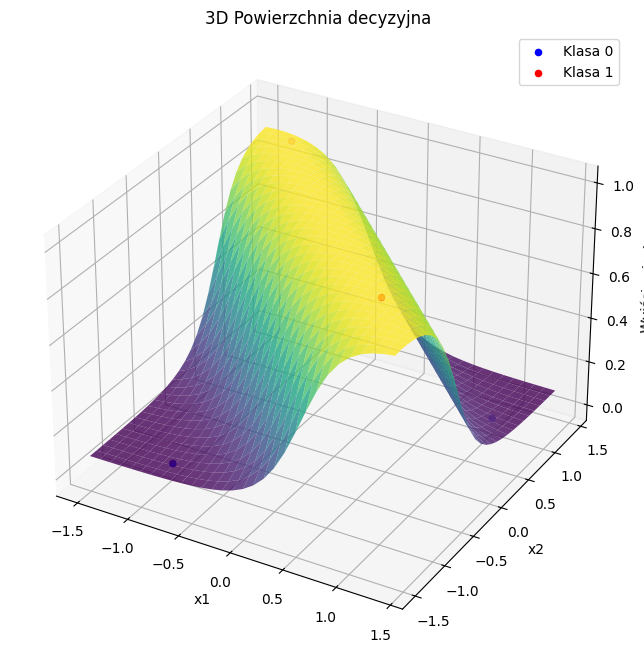

In [18]:
# prompt: zaproponuj jeszcze jakiś sposób prezentacji danych

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# ... (your existing code for functions: sigmoid, tanh, sigmoid_diff, tanh_diff, mlp, train_sample, train_epoch)


# Problem XOR
xx = np.array([[1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])
d = np.array([0, 1, 1, 0])

# Parametry
eta = 0.1  # Współczynnik uczenia
beta = (1, 1)  # Parametry funkcji aktywacji


# Trening i wizualizacja błędów dla obu metod
for method_name, training_function in [("Aktualizacja po próbce", train_sample), ("Aktualizacja po epoce", train_epoch)]:
    w1, w2, errors = training_function(xx, d, eta, beta)

    # Tworzenie DataFrame do lepszej prezentacji błędów
    error_df = pd.DataFrame({'Epoka': range(len(errors)), 'Błąd': errors})
    print(f"\nBłędy dla {method_name}:\n{error_df}")

    plt.figure(figsize=(8, 6))
    plt.plot(errors)
    plt.xlabel("Epoka")
    plt.ylabel("Błąd średniokwadratowy")
    plt.title(f"Błąd klasyfikacji podczas uczenia ({method_name})")
    plt.grid(True)
    plt.show()

    # ... (rest of your existing code for weights and decision boundary visualization)


# 3D Wizualizacja powierzchni decyzyjnej
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
xx_grid, yy_grid = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.zeros_like(xx_grid)

for i in range(xx_grid.shape[0]):
    for j in range(xx_grid.shape[1]):
        x = np.array([1, xx_grid[i, j], yy_grid[i, j]])
        y, _, _, _ = mlp(x, w1, w2, beta)
        Z[i, j] = y

ax.plot_surface(xx_grid, yy_grid, Z, cmap='viridis', alpha=0.8)
ax.scatter(xx[d == 0][:, 1], xx[d == 0][:, 2], d[d==0], c='blue', label='Klasa 0')
ax.scatter(xx[d == 1][:, 1], xx[d == 1][:, 2], d[d==1], c='red', label='Klasa 1')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Wyjście sieci")
ax.set_title("3D Powierzchnia decyzyjna")
ax.legend()
plt.show()